In [5]:
import os
from pathlib import Path

RESULTS_DIR = Path("/home/mjustyna/RNA-GNN")
result_files = os.listdir(RESULTS_DIR)
result_files = [f for f in result_files if f.endswith("_seg.csv")]
result_files

['grapharna_3_seg.csv',
 'grapharna_1_seg.csv',
 'boltz_1_seg.csv',
 'boltz_3_seg.csv',
 'boltz_2_seg.csv',
 'grapharna_2_seg.csv']

1423 1423 1423 N/A
1423 1423 1423


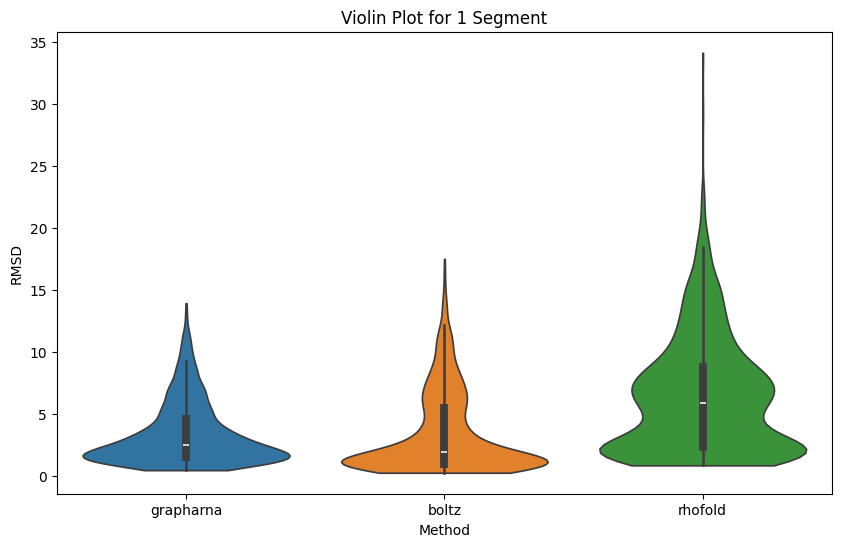

,grapharna,boltz,rhofold
0,0.497,0.288,0.885
1,0.553,0.334,0.988
2,0.558,0.351,1.014
3,0.560,0.365,1.018
4,0.571,0.373,1.027
...,...,...,...
1418,12.597,16.915,NaN
1419,13.017,17.530,NaN
1420,13.103,NaN,NaN
1421,13.658,NaN,NaN


In [28]:
import pandas as pd

def get_csv(num_seg:int):
    grapharna = RESULTS_DIR / f"grapharna_{num_seg}_seg.csv"
    boltz = RESULTS_DIR / f"boltz_{num_seg}_seg.csv"
    if num_seg == 1:
        rhofold = RESULTS_DIR / "rhofold_1_seg.csv"
        # drfold = RESULTS_DIR / "drfold_1_seg.csv"
        drfold = None  # drfold is not available for 1 segment
    else:
        rhofold = None
        drfold = None
    gr_df = pd.read_csv(grapharna)
    boltz_df = pd.read_csv(boltz)
    if rhofold is not None:
        rhofold_df = pd.read_csv(rhofold)
    if drfold is not None:
        drfold_df = pd.read_csv(drfold)
    grapharna_rmsd = gr_df["rms"].values
    boltz_rmsd = boltz_df["rms"].values
    grapharna_inf = gr_df["inf"].values
    boltz_inf = boltz_df["inf"].values
    if rhofold is not None:
        rhofold_rmsd = rhofold_df["rms"].values
        rhofold_inf = rhofold_df["inf"].values
    if drfold is not None:
        drfold_rmsd = drfold_df["rms"].values
        drfold_inf = drfold_df["inf"].values
    # combine into a single dataframe
    # if arrays are not the same lenght, then fill the shorter one with NaN
    if len(grapharna_rmsd) != len(boltz_rmsd):
        max_len = max(len(grapharna_rmsd), len(boltz_rmsd), len(rhofold_rmsd) if rhofold is not None else 0, len(drfold_rmsd) if drfold is not None else 0)
        grapharna_rmsd = pd.Series(grapharna_rmsd).reindex(range(max_len)).fillna(float('nan')).values
        boltz_rmsd = pd.Series(boltz_rmsd).reindex(range(max_len)).fillna(float('nan')).values
        rhofold_rmsd = pd.Series(rhofold_rmsd).reindex(range(max_len)).fillna(float('nan')).values if rhofold is not None else None
        # drfold_rmsd = pd.Series(drfold_rmsd).reindex(range(max_len)).fillna(float('nan')).values if drfold is not None else None
    
    if len(grapharna_inf) != len(boltz_inf):
        max_len = max(len(grapharna_inf), len(boltz_inf), len(rhofold_rmsd) if rhofold is not None else 0, len(drfold_rmsd) if drfold is not None else 0)
        grapharna_inf = pd.Series(grapharna_inf).reindex(range(max_len)).fillna(float('nan')).values
        boltz_inf = pd.Series(boltz_inf).reindex(range(max_len)).fillna(float('nan')).values
        rhofold_inf = pd.Series(rhofold_inf).reindex(range(max_len)).fillna(float('nan')).values if rhofold is not None else None
        # drfold_inf = pd.Series(drfold_df["inf"]).reindex(range(max_len)).fillna(float('nan')).values if drfold is not None else None
    print(len(grapharna_rmsd), len(boltz_rmsd), len(rhofold_rmsd) if rhofold is not None else "N/A", len(drfold_rmsd) if drfold is not None else "N/A")
    print(len(grapharna_inf), len(boltz_inf), len(rhofold_inf))
    df_rmsd = pd.DataFrame({
        "grapharna": grapharna_rmsd,
        "boltz": boltz_rmsd,
        "rhofold": rhofold_rmsd if rhofold is not None else None,
        # "drfold": drfold_rmsd if drfold is not None else None
    })
    df_inf = pd.DataFrame({
        "grapharna": grapharna_inf,
        "boltz": boltz_inf,
        "rhofold": rhofold_inf if rhofold is not None else None,
        # "drfold": drfold_inf if drfold is not None else None
    })
    return df_rmsd, df_inf

def violin_plot(df, title="Violin Plot", x_label="Method", y_label="RMSD"):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, cut=0)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

df_rmsd, df_inf = get_csv(1)
violin_plot(df_rmsd, title="Violin Plot for 1 Segment", x_label="Method", y_label="RMSD")
df_rmsd


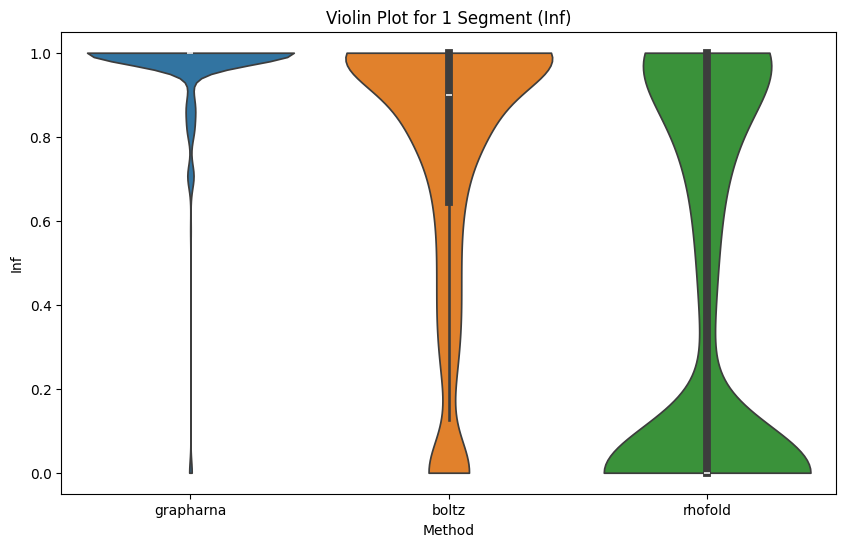

In [29]:
violin_plot(df_inf, title="Violin Plot for 1 Segment (Inf)", x_label="Method", y_label="Inf")

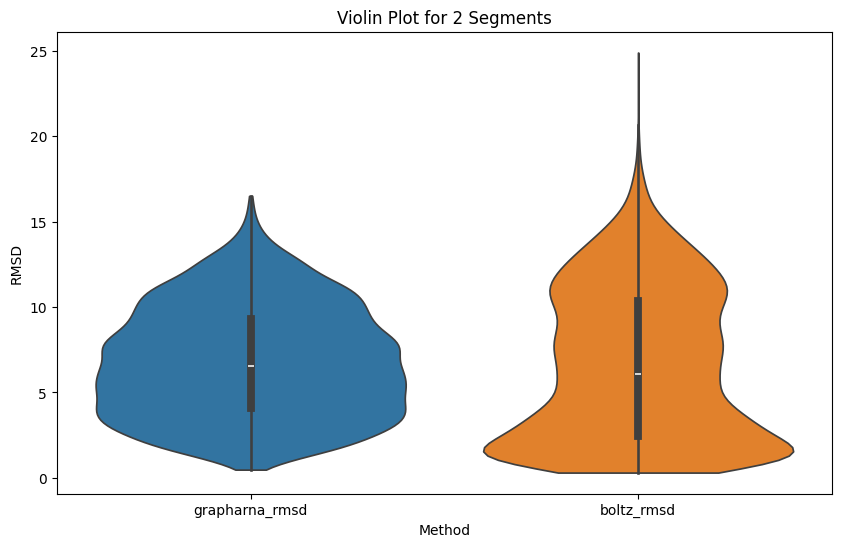

,grapharna_rmsd,boltz_rmsd
0,0.486,0.313
1,0.632,0.331
2,0.661,0.346
3,0.662,0.348
4,0.678,0.369
...,...,...
4828,16.076,NaN
4829,16.153,NaN
4830,16.306,NaN
4831,16.495,NaN


In [16]:
df_rmsd, df_inf = get_csv(2)
violin_plot(df_rmsd, title="Violin Plot for 2 Segments", x_label="Method", y_label="RMSD")
df_rmsd

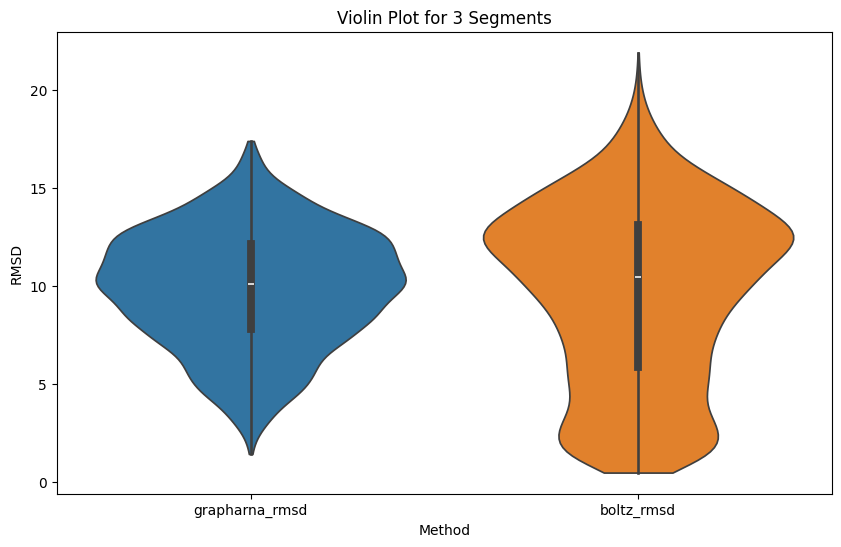

,grapharna_rmsd,boltz_rmsd
0,1.412,0.463
1,1.634,0.476
2,1.796,0.563
3,1.814,0.575
4,1.947,0.577
...,...,...
4319,17.105,NaN
4320,17.159,NaN
4321,17.218,NaN
4322,17.334,NaN


In [17]:
df_rmsd, df_inf = get_csv(3)
violin_plot(df_rmsd, title="Violin Plot for 3 Segments", x_label="Method", y_label="RMSD")
df_rmsd